In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
from statsmodels.genmod import families
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D214\diabetes_binary_health_indicators_BRFSS2015.csv")
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.shape

(253680, 22)

In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# check for missing values
display(df.isnull().any())

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [7]:
# we will check for unique values for categorical variables in the dataset

for c in df.loc[:, df.columns]:
    if df.dtypes[c]=="float64":
        print("\n{} unique values: {}".format(c,df[c].unique()))


Diabetes_binary unique values: [0. 1.]

HighBP unique values: [1. 0.]

HighChol unique values: [1. 0.]

CholCheck unique values: [1. 0.]

BMI unique values: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]

Smoker unique values: [1. 0.]

Stroke unique values: [0. 1.]

HeartDiseaseorAttack unique values: [0. 1.]

PhysActivity unique values: [0. 1.]

Fruits unique values: [0. 1.]

Veggies unique values: [1. 0.]

HvyAlcoholConsump unique values: [0. 1.]

AnyHealthcare unique values: [1. 0.]

NoDocbcCost unique values: [0. 1.]

GenHlth unique values: [5. 3. 2. 4. 1.]

MentHlth unique values: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 1

In [8]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
# there are no nulls, we will check for the conditions of logistic regression

# assumption one - check to make sure that the target variable is binary
print(df['Diabetes_binary'].unique())

[0. 1.]


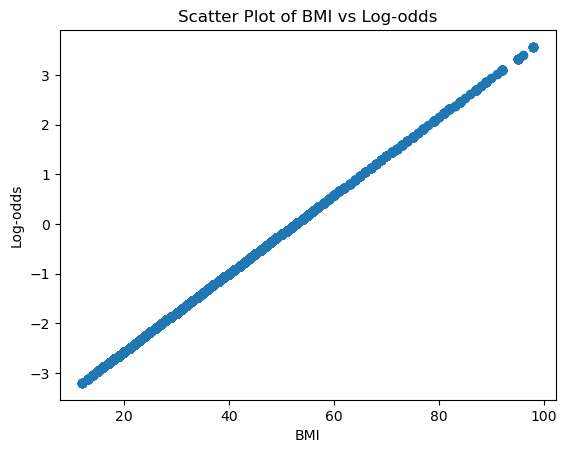

In [10]:
# assumption two, there must be linearity between the target variable and all continuous variables

# BMI is the only continuous variable, we will check BMI and Diabetes_binary for linearity
target_variable = 'Diabetes_binary'
predictor_variable = 'BMI'

# Prepare the data for logistic regression
X = sm.add_constant(df[predictor_variable])  # Add a constant term for the intercept
y = df[target_variable]

# Fit logistic regression
logit_results = sm.GLM(y, X, family=families.Binomial()).fit()

# Getting predicted probabilities
predicted_probabilities = logit_results.predict(X)

# Getting log odds values
log_odds = np.log(predicted_probabilities / (1 - predicted_probabilities))

# Visualize predictor variable vs logit values
plt.scatter(x=X[predictor_variable], y=log_odds)
plt.xlabel(predictor_variable)
plt.ylabel("Log-odds")
plt.title(f"Scatter Plot of {predictor_variable} vs Log-odds")
plt.show()

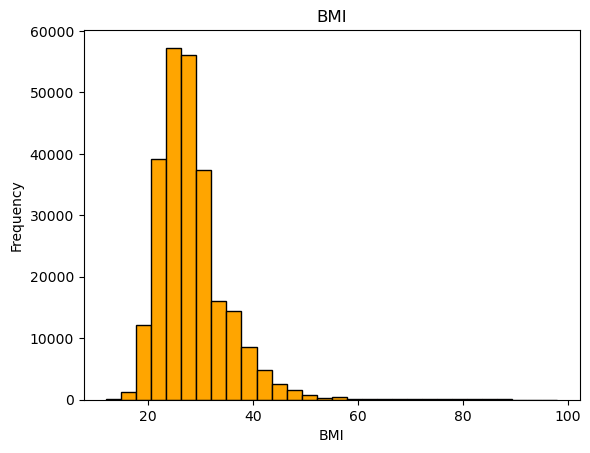

In [11]:
# assumption three, no influential outliers in the data

# check BMI for outliers

# Plotting the histogram
plt.hist(df['BMI'], bins=30, color='orange', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI')
plt.show()

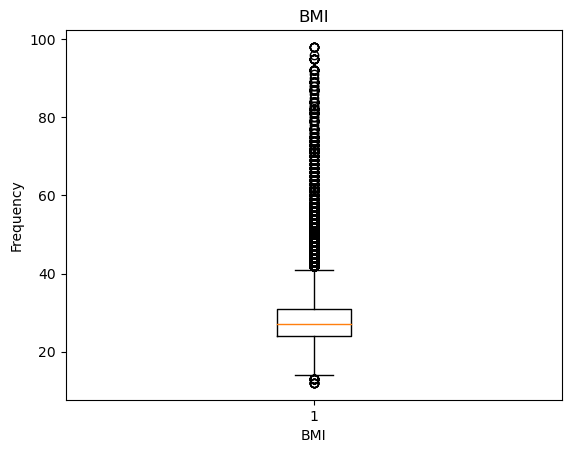

In [12]:
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI')
plt.show()

In [13]:
bmi_variable = 'BMI'

# Define bin edges and numerical labels
bin_edges = [0, 18.5, 25, 30, 35, 40, float('inf')]  # Adjust the bin edges as needed
numerical_labels = [1, 2, 3, 4, 5, 6]

# Bin the BMI variable
df['BMI_Category'] = pd.cut(df[bmi_variable], bins=bin_edges, labels=numerical_labels, include_lowest=True)

# Display the resulting DataFrame
print(df[['BMI', 'BMI_Category']])

         BMI BMI_Category
0       40.0            5
1       25.0            2
2       28.0            3
3       27.0            3
4       24.0            2
...      ...          ...
253675  45.0            6
253676  18.0            1
253677  28.0            3
253678  23.0            2
253679  25.0            2

[253680 rows x 2 columns]


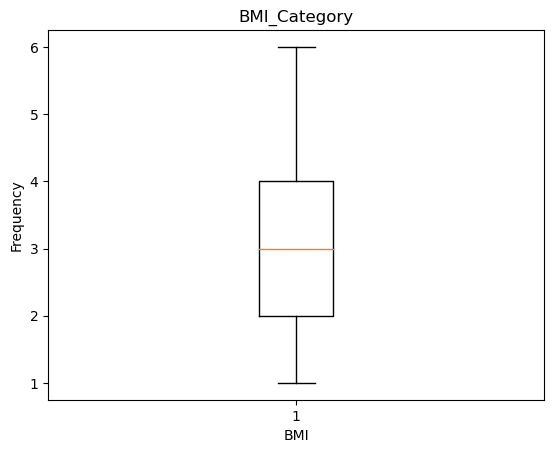

In [14]:
plt.boxplot(df['BMI_Category'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI_Category')
plt.show()

C:\Users\shabn\AppData\Local\Temp\ipykernel_15844\2408224700.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap="RdPu", fmt=".1f")


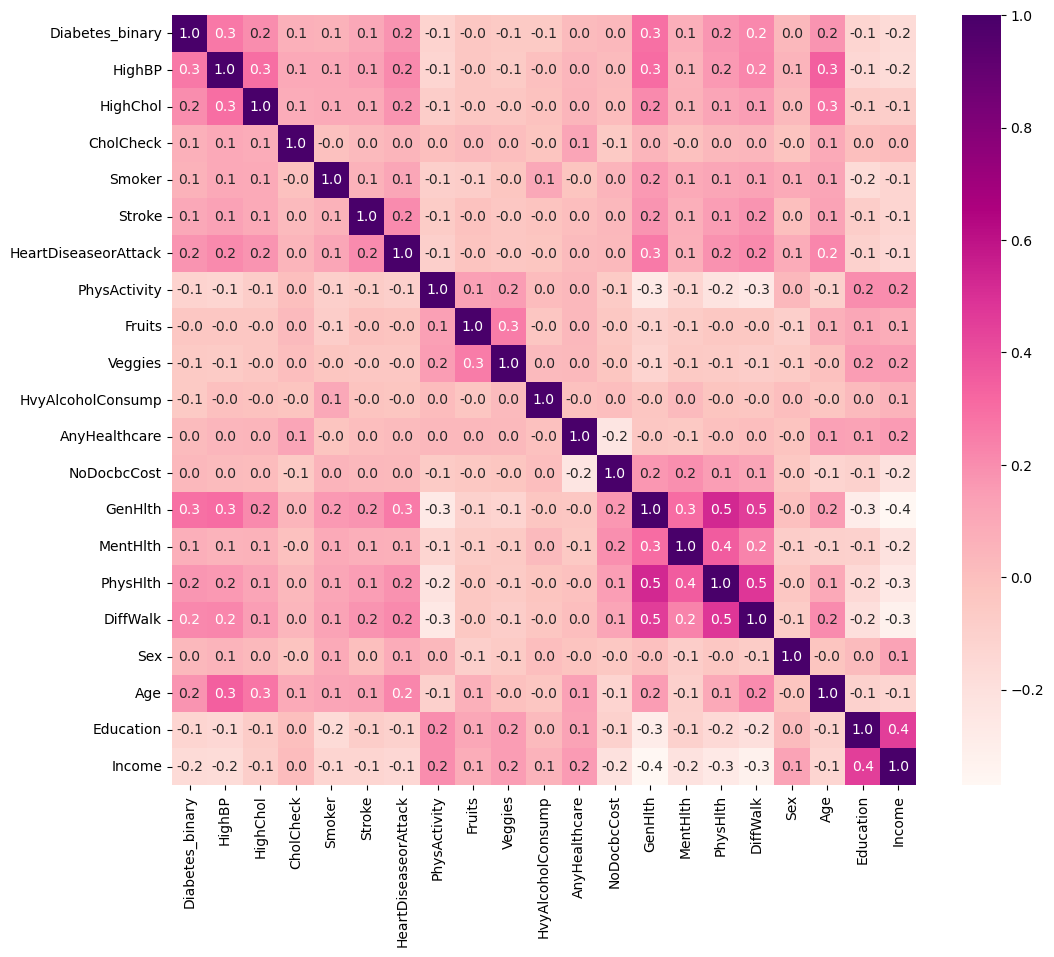

In [15]:
# fourth condition is to assess the correlation matrix to check for multicollinearity

variables = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Category', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

df2 = df[variables]

plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap="RdPu", fmt=".1f")

# Display the plot
plt.show()

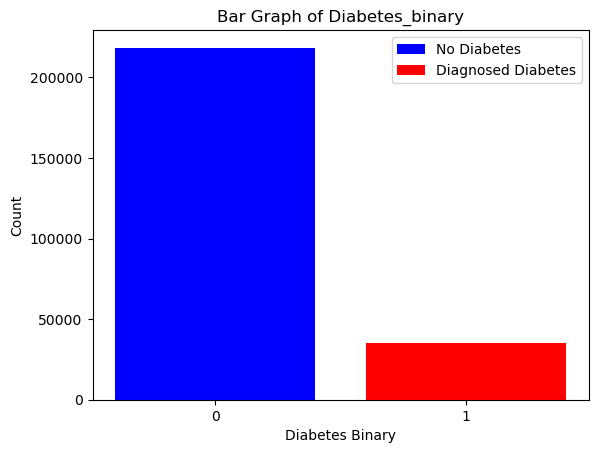

In [17]:
counts = df['Diabetes_binary'].value_counts()

# Plotting the bar graph
plt.bar(counts.index, counts.values, color=['blue', 'red'], label=['No Diabetes', 'Diagnosed Diabetes'])

# Adding labels and title
plt.xticks([0, 1])
plt.xlabel('Diabetes Binary')
plt.ylabel('Count')
plt.title('Bar Graph of Diabetes_binary')

# Adding legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='BMI_Category', ylabel='Diabetes_binary'>

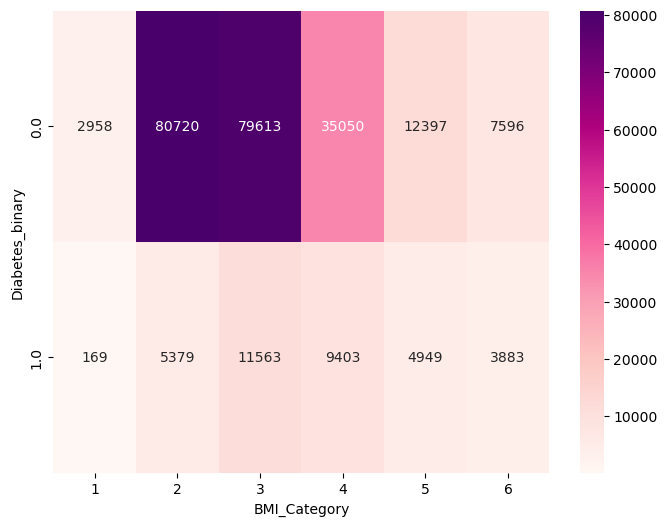

In [18]:
contingency = pd.crosstab(df['Diabetes_binary'], df['BMI_Category'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency, annot=True, cmap="RdPu", fmt='d')

<Axes: xlabel='GenHlth', ylabel='Diabetes_binary'>

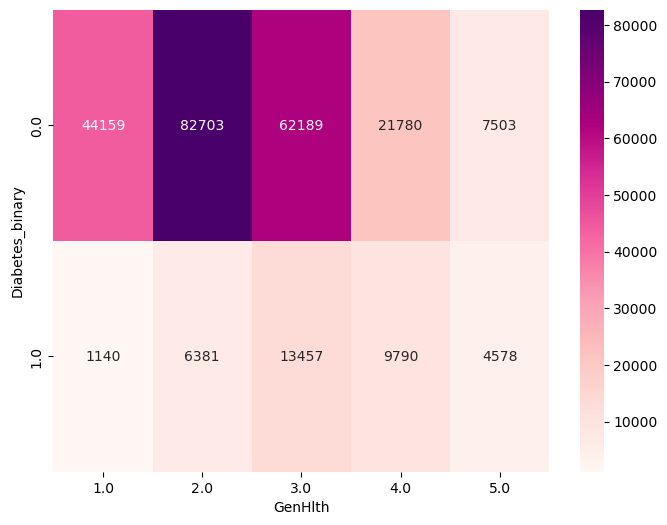

In [19]:
contingency3 = pd.crosstab(df['Diabetes_binary'], df['GenHlth'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency3, annot=True,cmap="RdPu", fmt='d')

<Axes: xlabel='MentHlth', ylabel='Diabetes_binary'>

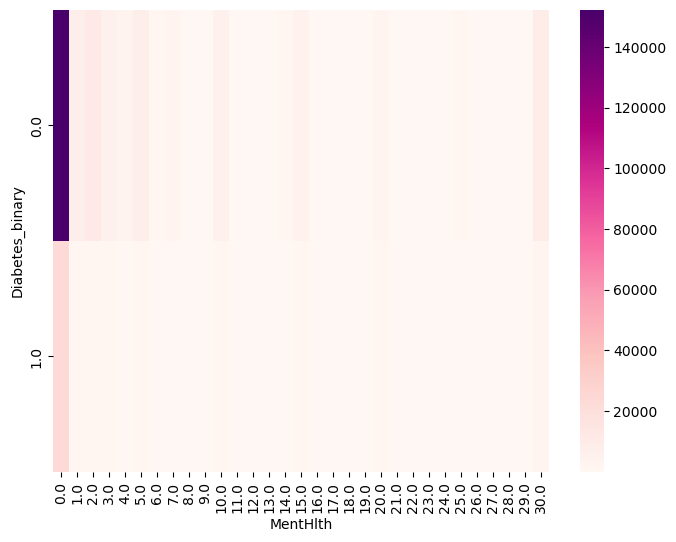

In [22]:
contingency1 = pd.crosstab(df['Diabetes_binary'], df['MentHlth'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency1, annot=False, cmap="RdPu", fmt='d')

<Axes: xlabel='PhysHlth', ylabel='Diabetes_binary'>

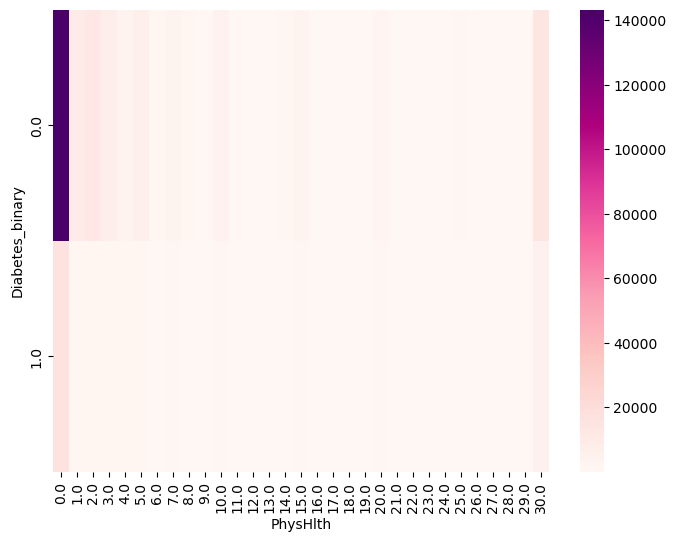

In [23]:
contingency2 = pd.crosstab(df['Diabetes_binary'], df['PhysHlth'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency2, annot=False, cmap="RdPu", fmt='d')

<Axes: xlabel='Age', ylabel='Diabetes_binary'>

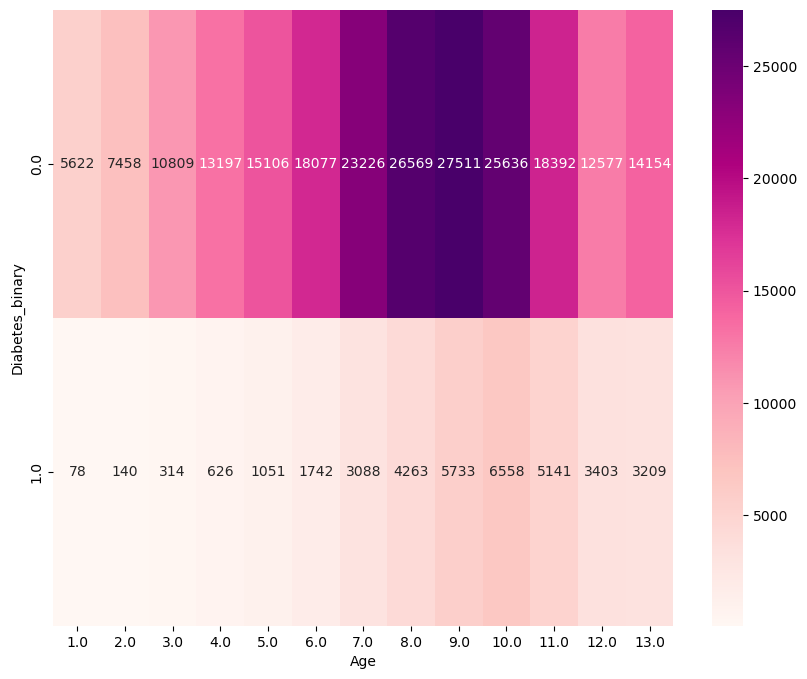

In [24]:
contingency5 = pd.crosstab(df['Diabetes_binary'], df['Age'])
plt.figure(figsize=(10,8))
sns.heatmap(contingency5, annot=True,cmap="RdPu", fmt='d')

<Axes: xlabel='Education', ylabel='Diabetes_binary'>

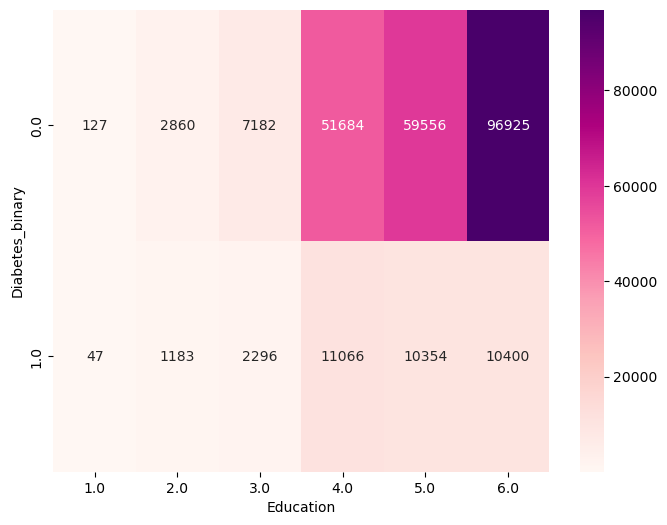

In [25]:
contingency6 = pd.crosstab(df['Diabetes_binary'], df['Education'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency6, annot=True,cmap="RdPu", fmt='d')

<Axes: xlabel='Income', ylabel='Diabetes_binary'>

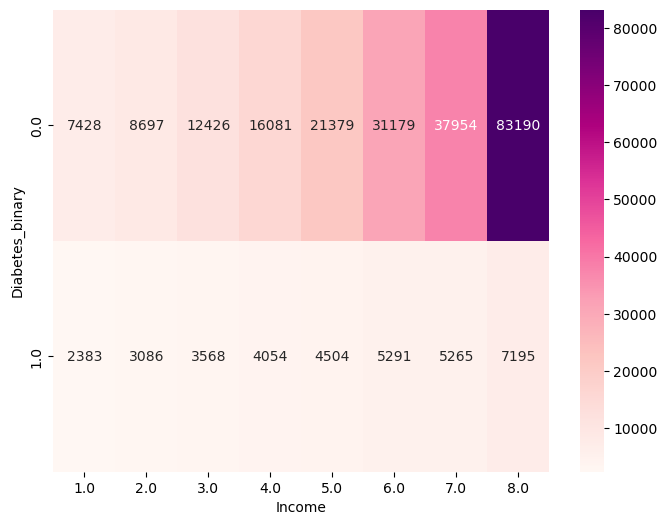

In [26]:
contingency7 = pd.crosstab(df['Diabetes_binary'], df['Income'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency7, annot=True,cmap="RdPu", fmt='d')

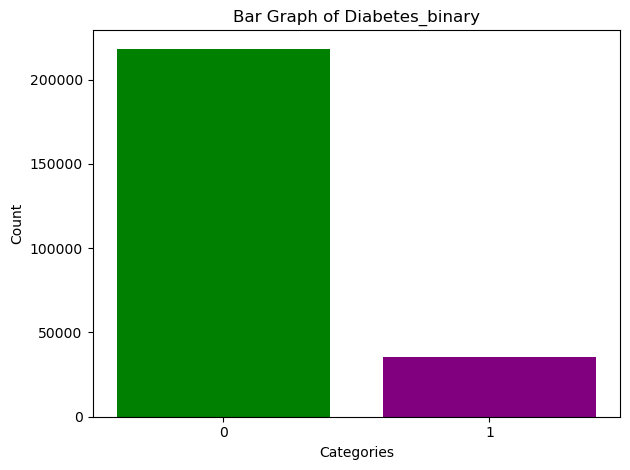

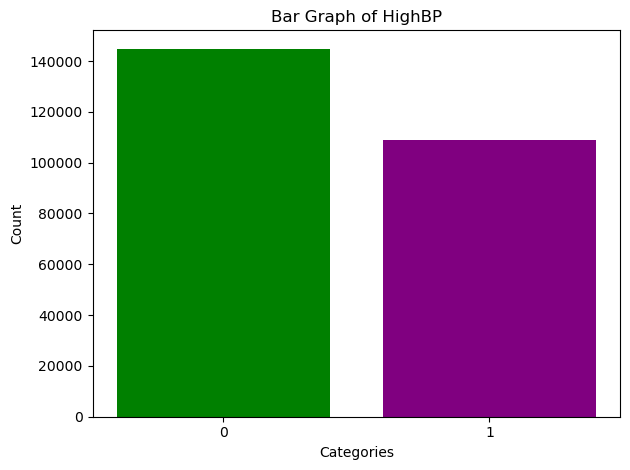

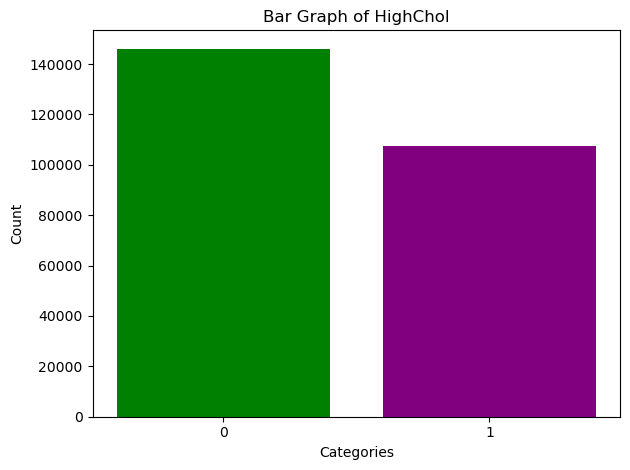

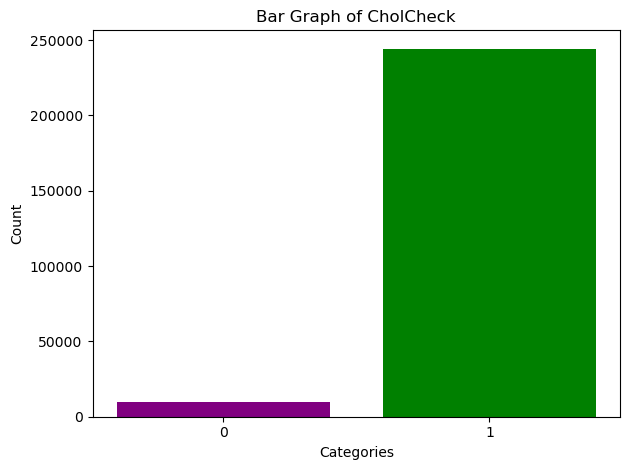

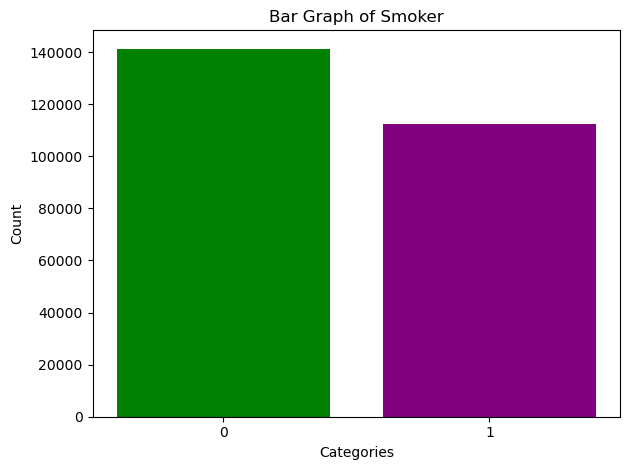

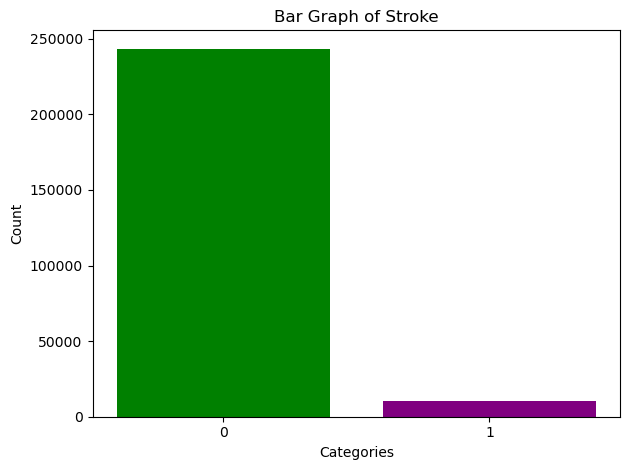

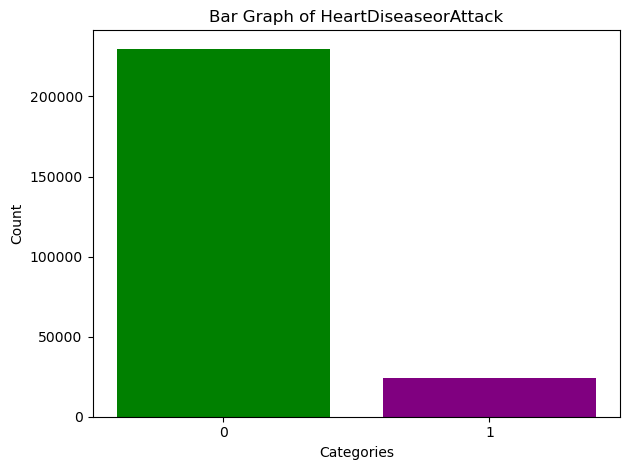

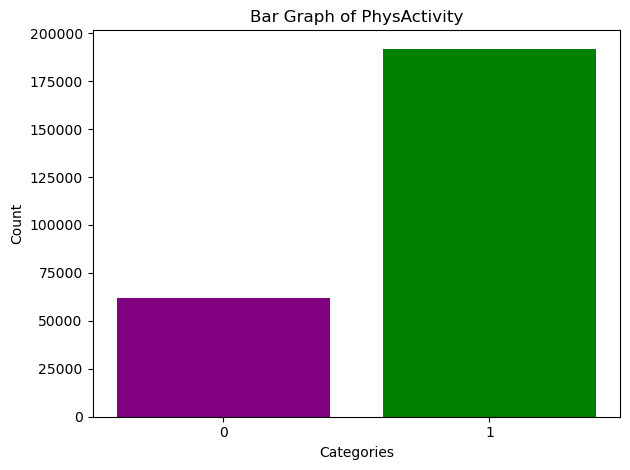

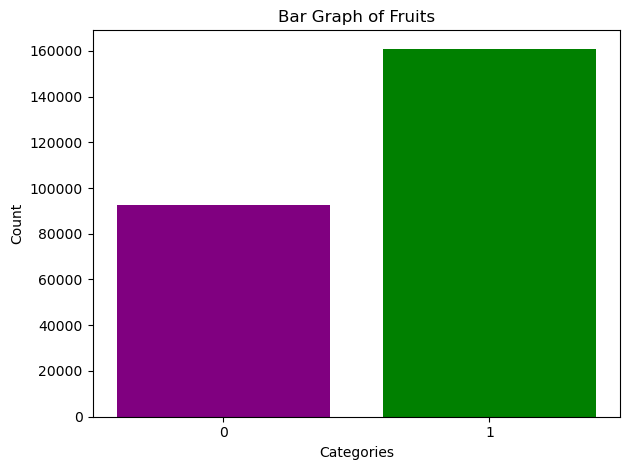

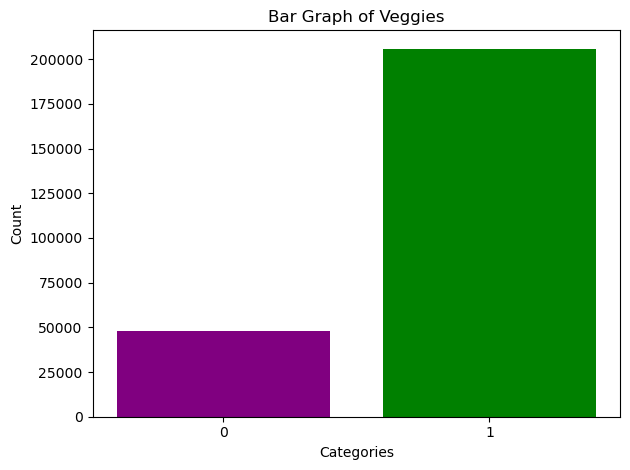

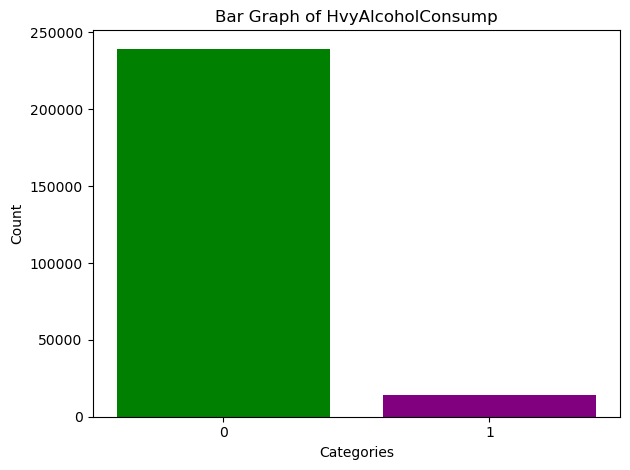

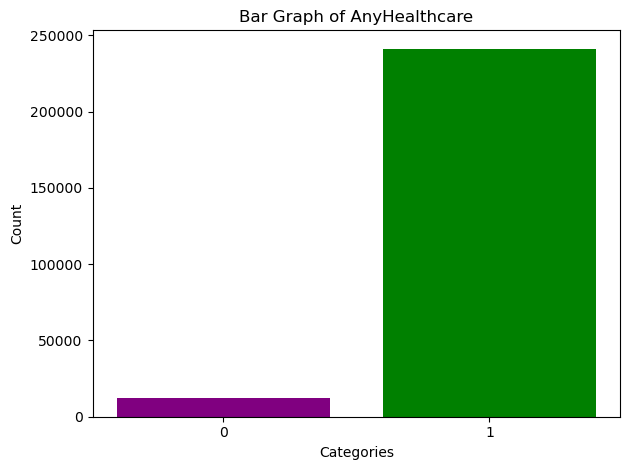

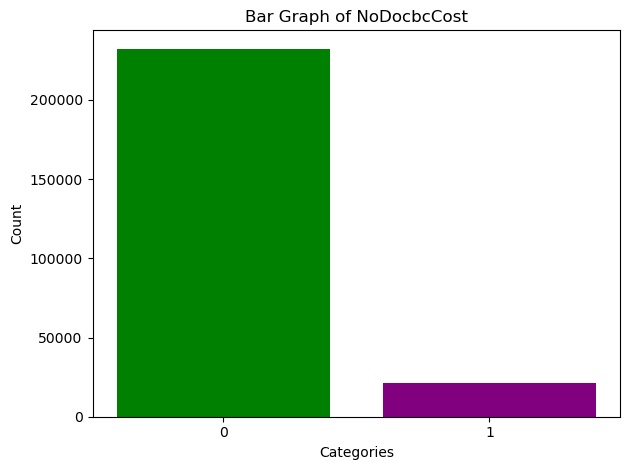

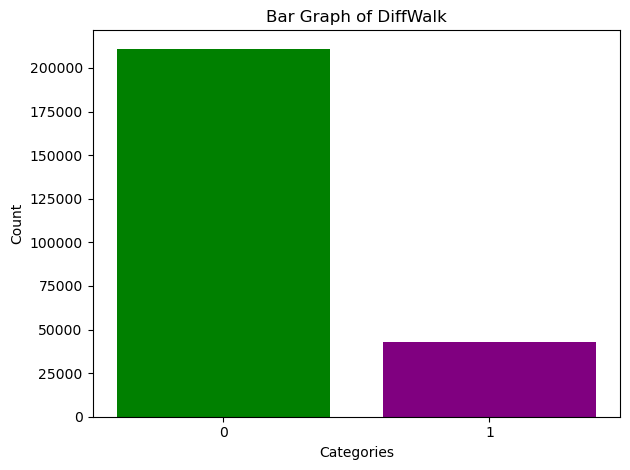

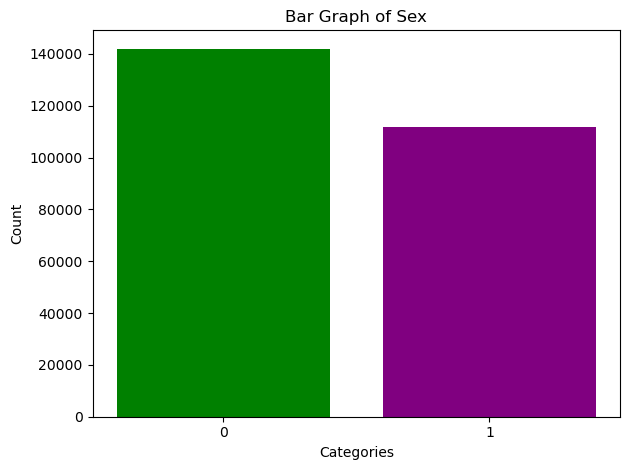

In [28]:
binary_variables = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
        'DiffWalk', 'Sex']

for variable in binary_variables:
    counts = df[variable].value_counts()
    plt.bar(counts.index, counts.values, color=['green', 'purple'])
    plt.xticks([0, 1])
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(f'Bar Graph of {variable}')
    
    plt.tight_layout()
    
    plt.show()

array([[<Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>]], dtype=object)

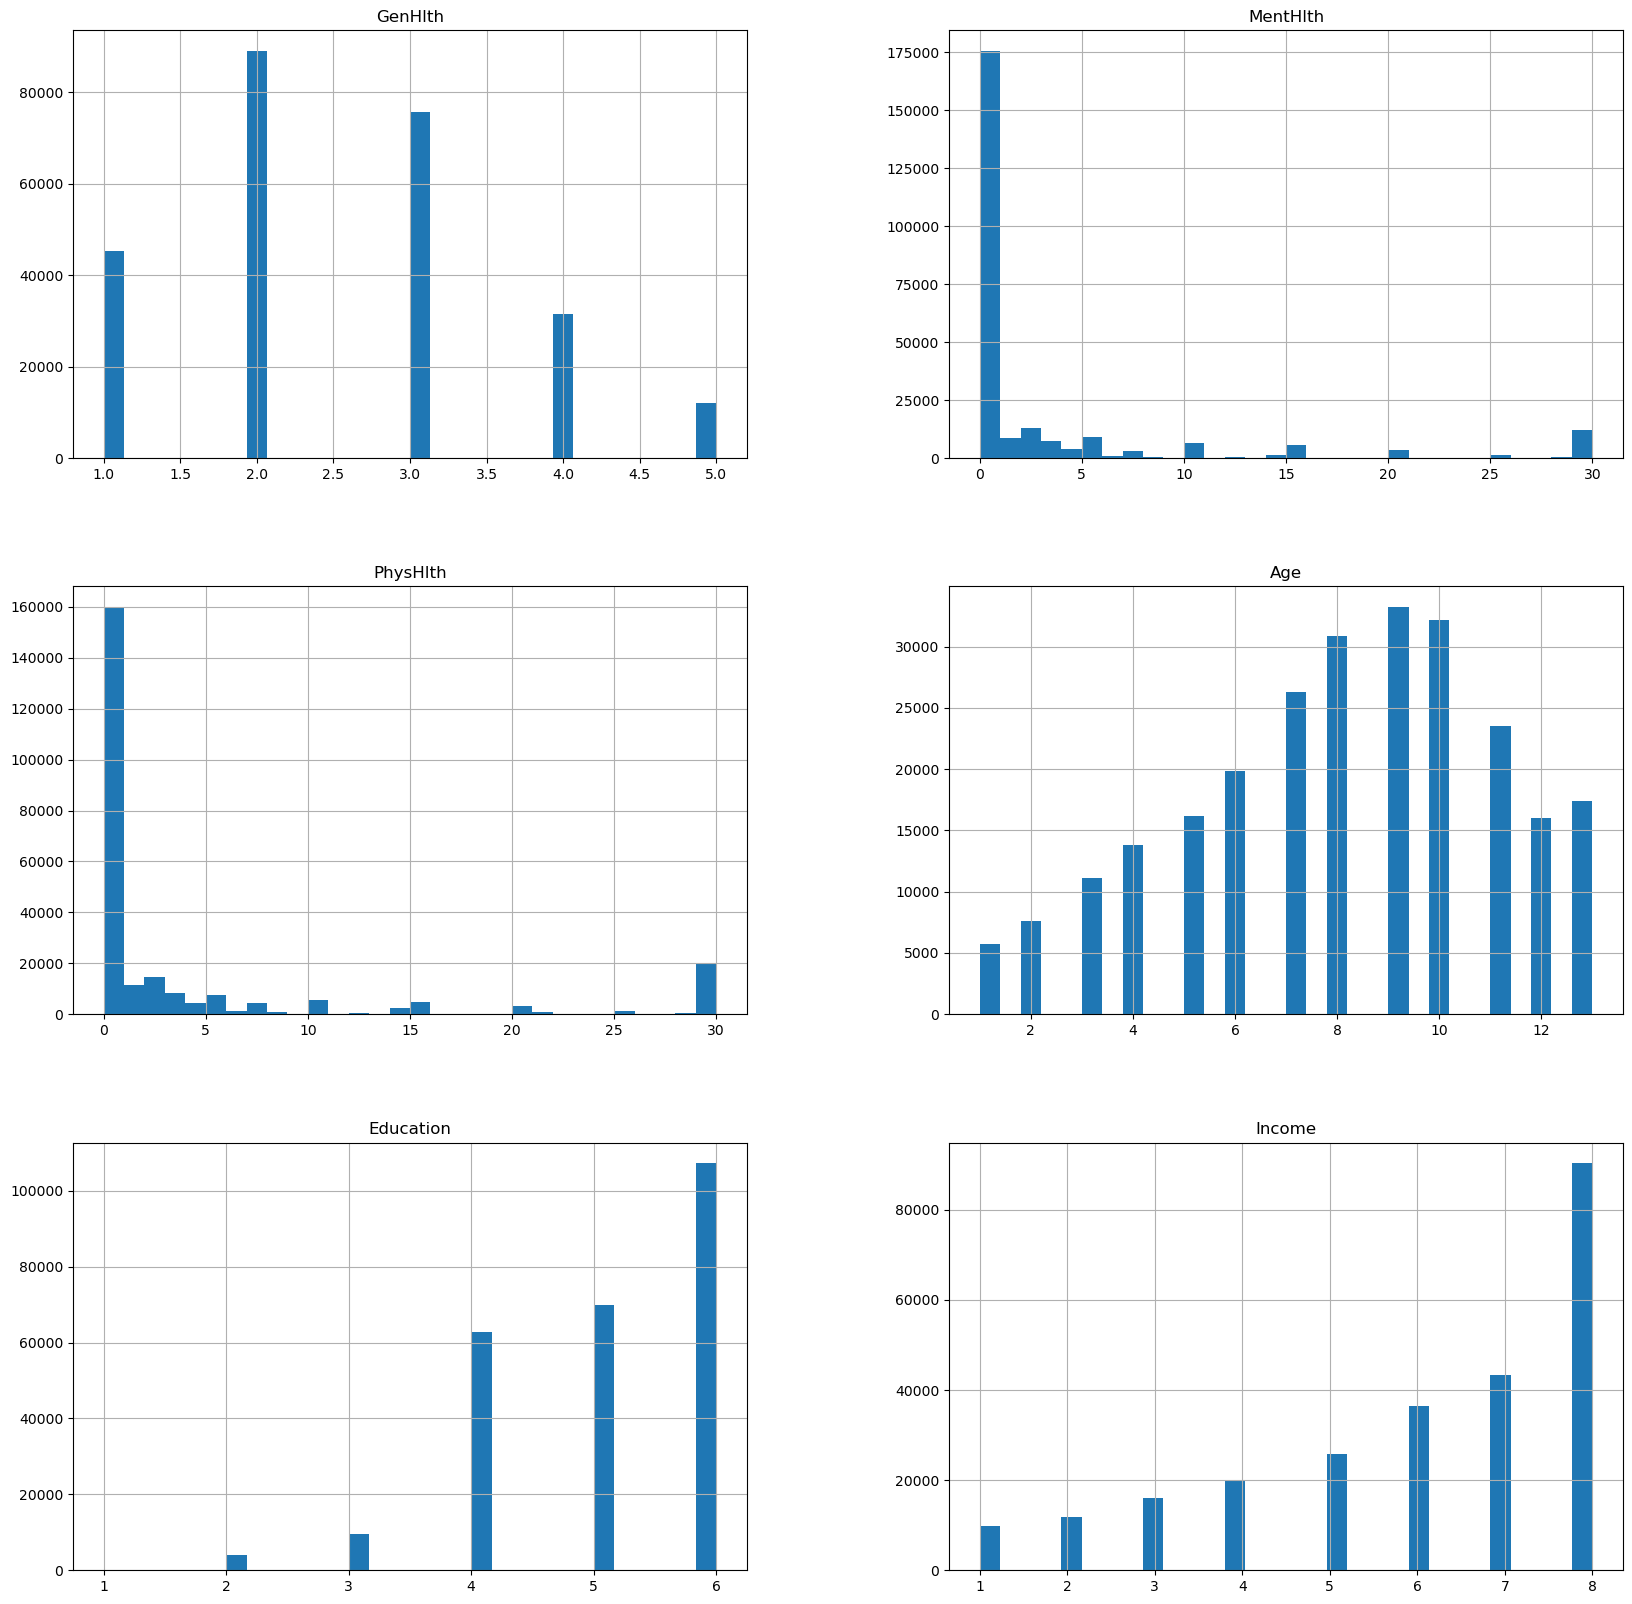

In [29]:
selected_columns = ['BMI_Category', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

df[selected_columns].hist(bins=30, figsize=(20, 20))

In [32]:
df['Intercept']=1

log_reg_results = sm.Logit(df['Diabetes_binary'], df[['HighBP', 'HighChol', 'CholCheck', 'BMI_Category', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income', 'Intercept']]).fit()

print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.317913
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253658
Method:                           MLE   Df Model:                           21
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.2126
Time:                        19:09:53   Log-Likelihood:                -80648.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.7231      0.015     48.866      0.000       0.694       0.752

In [41]:
df['Intercept']=1

log_reg_results_reduced = sm.Logit(df['Diabetes_binary'], df[['HighBP', 'HighChol', 'CholCheck', 'BMI_Category',
       'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth',
        'DiffWalk', 'Sex', 'Age', 'Intercept']]).fit()

print(log_reg_results_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.318886
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253668
Method:                           MLE   Df Model:                           11
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.2102
Time:                        19:21:53   Log-Likelihood:                -80895.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.7391      0.015     50.070      0.000       0.710       0.768